In [ ]:
import orcascreen.mutate_with_rdm as mm # type: ignore
import orcascreen.mutate as m # type: ignore
import orcascreen.process_sequence as ps # type: ignore
import orcascreen.matrices as mat # type: ignore

from pysam import FastaFile
from Bio import SeqIO

from matplotlib.backends.backend_pdf import PdfPages

from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import pandas as pd
import os

%matplotlib inline

In [2]:
# import os

# # Get the current working directory
# current_directory = os.getcwd()
# print("Current working directory:", current_directory)
# # os.chdir("/home/fforge/Stage-IA3D/notebooks/outputs/test/Comparison_between_muts")
# os.chdir("/home/fforge/Stage-IA3D/notebooks/outputs/test")
# current_directory = os.getcwd()
# print("Current working directory:", current_directory)

# 

In [3]:
# mutationfile = None
# bedfile = "./notebooks/resources/annotations/chr9_100_CTCF_btw_16000000_16200000.bed"
# ref_fasta = "./notebooks/resources/genome/Homo_sapiens.GRCh38.dna.primary_assembly/sequence.fa"
# mut_path = "./notebooks/outputs/genome/chr9_compartement_bin_shuffled"
# mutationtype = "shuffle"
# nb_random = 5
# edtrguy = "experience/"

# 

In [4]:
# import re

# def natural_key(s):
#     # Split the string into a list of strings and integers
#     return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', s)]


# l_repo = ['phast_cons_1_lowest_scores', 'phast_cons_highest_scores', 'H3K9me3_ENCAN577WMG_q_val_over_5', 'H3K9me3_ENCAN577WMG', 'H3K9me3_ENCAN577WMG_q_val_over_7', 'H3K4me3_ENCAN356JCU', 'SINE', 'H3K9me3_ENCAN577WMG_q_val_over_10', 'reference_cds']
# l_expe_name = ['phast_cons_1_lowest_scores', 'phast_cons_highest_scores', 'H3K9me3_q_val_over_5', 'H3K9me3', 'H3K9me3_q_val_over_7', 'H3K4me3', 'SINE', 'H3K9me3_q_val_over_10', 'refseq_cds']

# l_repo = sorted(l_repo, key=natural_key)
# l_expe_name = sorted(l_expe_name, key=natural_key)



# Example for --expe_names flag in multiple_mut_analysis command
cds_free_phast_cons_highest_scores:Most_conserved_without_conding_sequence,cds_free_smaller_phast_cons_highest_scores:Smaller_most_conserved_without_conding_sequence,CTCF:CTCF,excluded_refseq_tss:Transription_start_site_not_in_reference,H3K4me1_ENCAN895IMP:H3K4me1,H3K4me3_ENCAN356JCU:H3K4me3,H3K9me3_ENCAN577WMG_q_val_over_5:H3K9me3_\$q-value \leq 10^{-5}\$,H3K9me3_ENCAN577WMG_q_val_over_7:H3K9me3_\$q-value \leq 10^{-7}\$,H3K9me3_ENCAN577WMG_q_val_over_10:H3K9me3_\$q-value \leq 10^{-10}\$,H3K27ac_ENCAN891UCN:H3K27ac,H3K27me3_ENCAN368BEA:H3K27me3,H3K27me3_ENCAN368BEA_q_val_over_10:H3K27me3_\$q-value \leq 10^{-1}\$,H3K27me3_ENCAN368BEA_q_val_over_25:H3K27me3_\$q-value \leq 10^{-2.5}\$,H3K27me3_ENCAN368BEA_q_val_over_50:H3K27me3_\$q-value \leq 10^{-5}\$,H3K27me3_ENCAN368BEA_q_val_over_75:H3K27me3_\$q-value \leq 10^{-7.5}\$,H3K27me3_ENCAN368BEA_q_val_over_100:H3K27me3_\$q-value \leq 10^{-10}\$,LINE:LINE,phast_cons_1_lowest_scores:Less_conserved,phast_cons_10_lowest_scores:More_less_conserved,phast_cons_highest_scores:Most_conserved,refseq_cds:Coding_sequences,SINE:SINE,smaller_phast_cons_1_lowest_scores:Smaller_less_conserved,smaller_phast_cons_highest_scores:Smaller_most_conserved,tss_extracted:Transription_start_site_patterns,tss_refseq:Transription_start_site_reference,tts_extracted:Transription_terminal_site_patterns,refseq_exclusive_tss:Transcription_start_site_only_in_reference,20_CTCF_over_TAD_limit:20_CTCF_over_TAD_limit,30_CTCF_inside_TAD:30_CTCF_inside_TAD,H3K9me3_ENCAN577WMG:H3K9me3

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)
# os.chdir("/home/fforge/Stage-IA3D/notebooks/outputs/test/Comparison_between_muts")
os.chdir("PATH/TO/experience")
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /home/fforge/mnt/genobioinfo/work/work/orca_snake/work/experience/Bottom_up/First_try
Current working directory: /home/fforge/TEMPORAIRE/experience/Classical_runs


2025-08-19 16:45:09,824 - INFO - No mutation information available.
2025-08-19 16:45:09,825 - INFO - There is no information about mutations in this Matrix object...histogram of mutations is not computable.


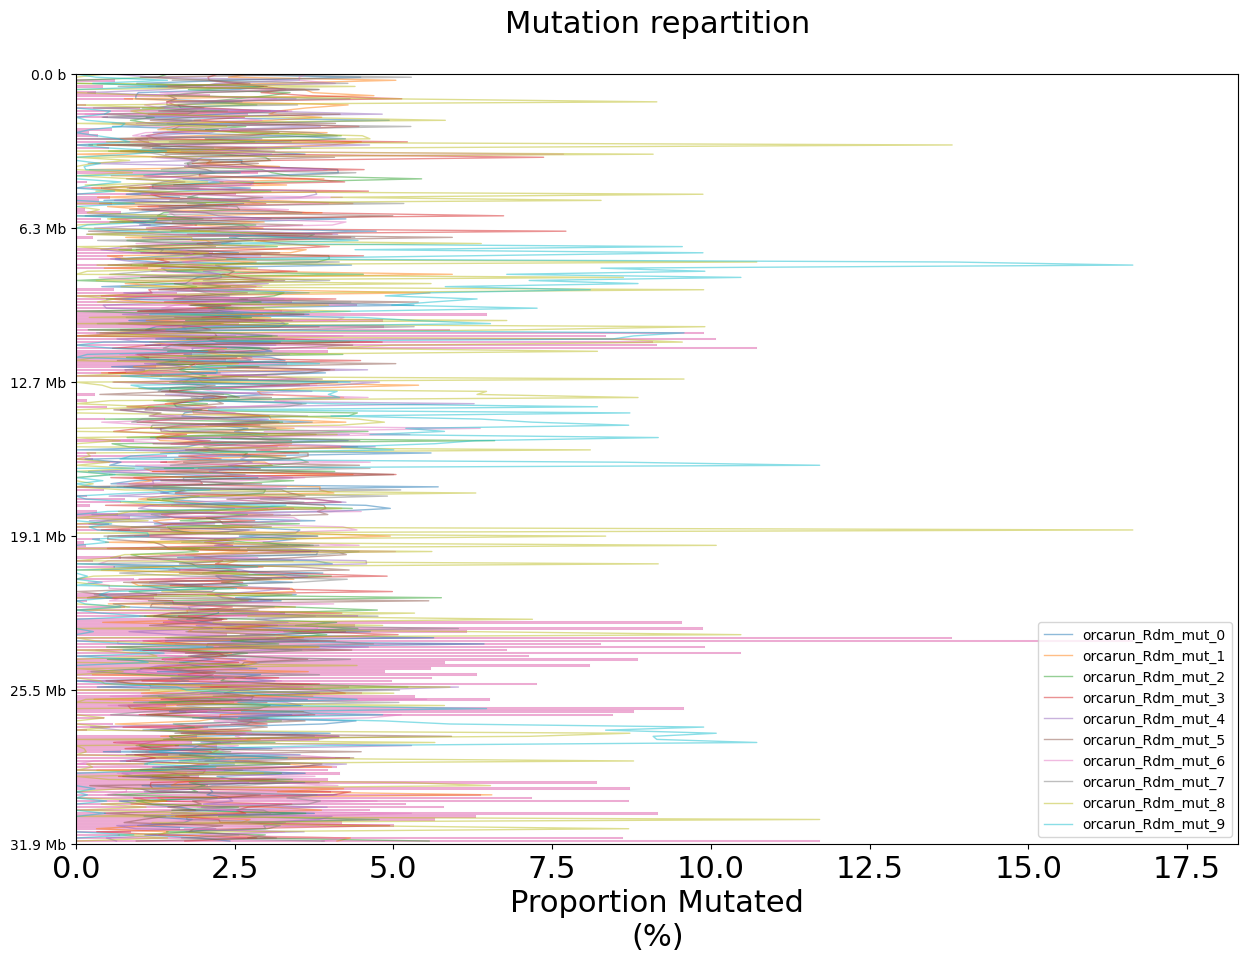

In [ ]:
builder_path = f"PATH/TO/matrices_builder"
mat_comparisons = mat.build_CompareMatrices(filepathref=f"{builder_path}/ref_orcarun.csv", filepathcomp=f"{builder_path}/orcarun.csv")
mat_comparisons.hist_mutations(resol="32Mb")

0.18309843750000002


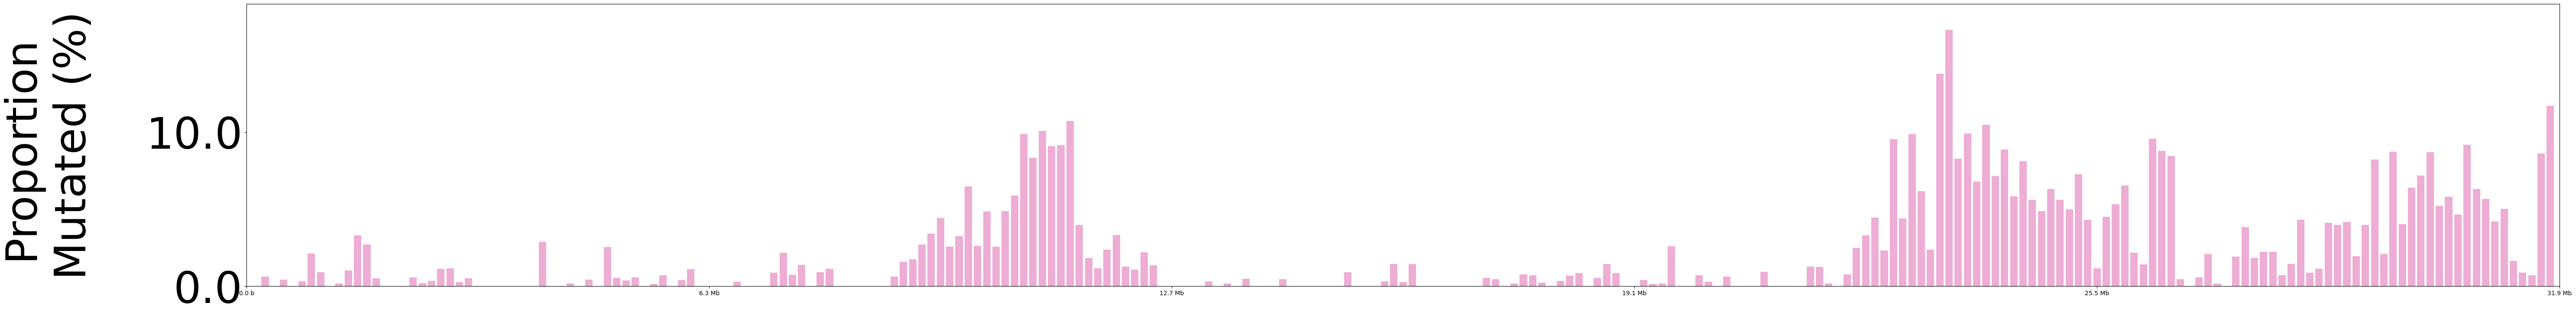

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plots_path = "PATH/TO/FIGURE/FOLDER/Fig_Random_mut_a.pdf"
with PdfPages(plots_path, keep_empty=False) as pdf:
    gs = GridSpec(nrows=1, ncols=1)
    f = plt.figure(clear=True, figsize=(60, 8.45))
    f.subplots_adjust(left=.1, right=.99)
    ax = mat_comparisons.comp_dict["orcarun_Wtd_mut"].di["32Mb"].hist_mutations(gs=gs, f=f, show_prop=True, orientation="vertical") # Reference - a
    # ax = mat_comparisons.comp_dict["orcarun_Rdm_mut_7"].di["32Mb"].hist_mutations(gs=gs, f=f, show_prop=True, orientation="vertical", color="#66C2A5") # Globally shuffled - b
    # ax = mat_comparisons.comp_dict["orcarun_Rdm_mut_8"].di["32Mb"].hist_mutations(gs=gs, f=f, show_prop=True, orientation="vertical", color="#FC8D62") # Shuffled per bin - d
    # ax = mat_comparisons.comp_dict["orcarun_Rdm_mut_9"].di["32Mb"].hist_mutations(gs=gs, f=f, show_prop=True, orientation="vertical", color="#8DA0CB") # Shifted - c
    ymax = 1.1 * max(mat_comparisons.comp_dict["orcarun_Wtd_mut"].di["32Mb"].mutation_proportion_per_bin())
    print(ymax)
    ax.set_ylim(0.0, ymax=ymax)
    ax.tick_params(axis='y', labelsize=72)
    ax.set_ylabel(f"Proportion \nMutated (%)\n", fontsize=72)
    ax.set_title("", fontsize=1)
    pdf.savefig()
    pdf.close()

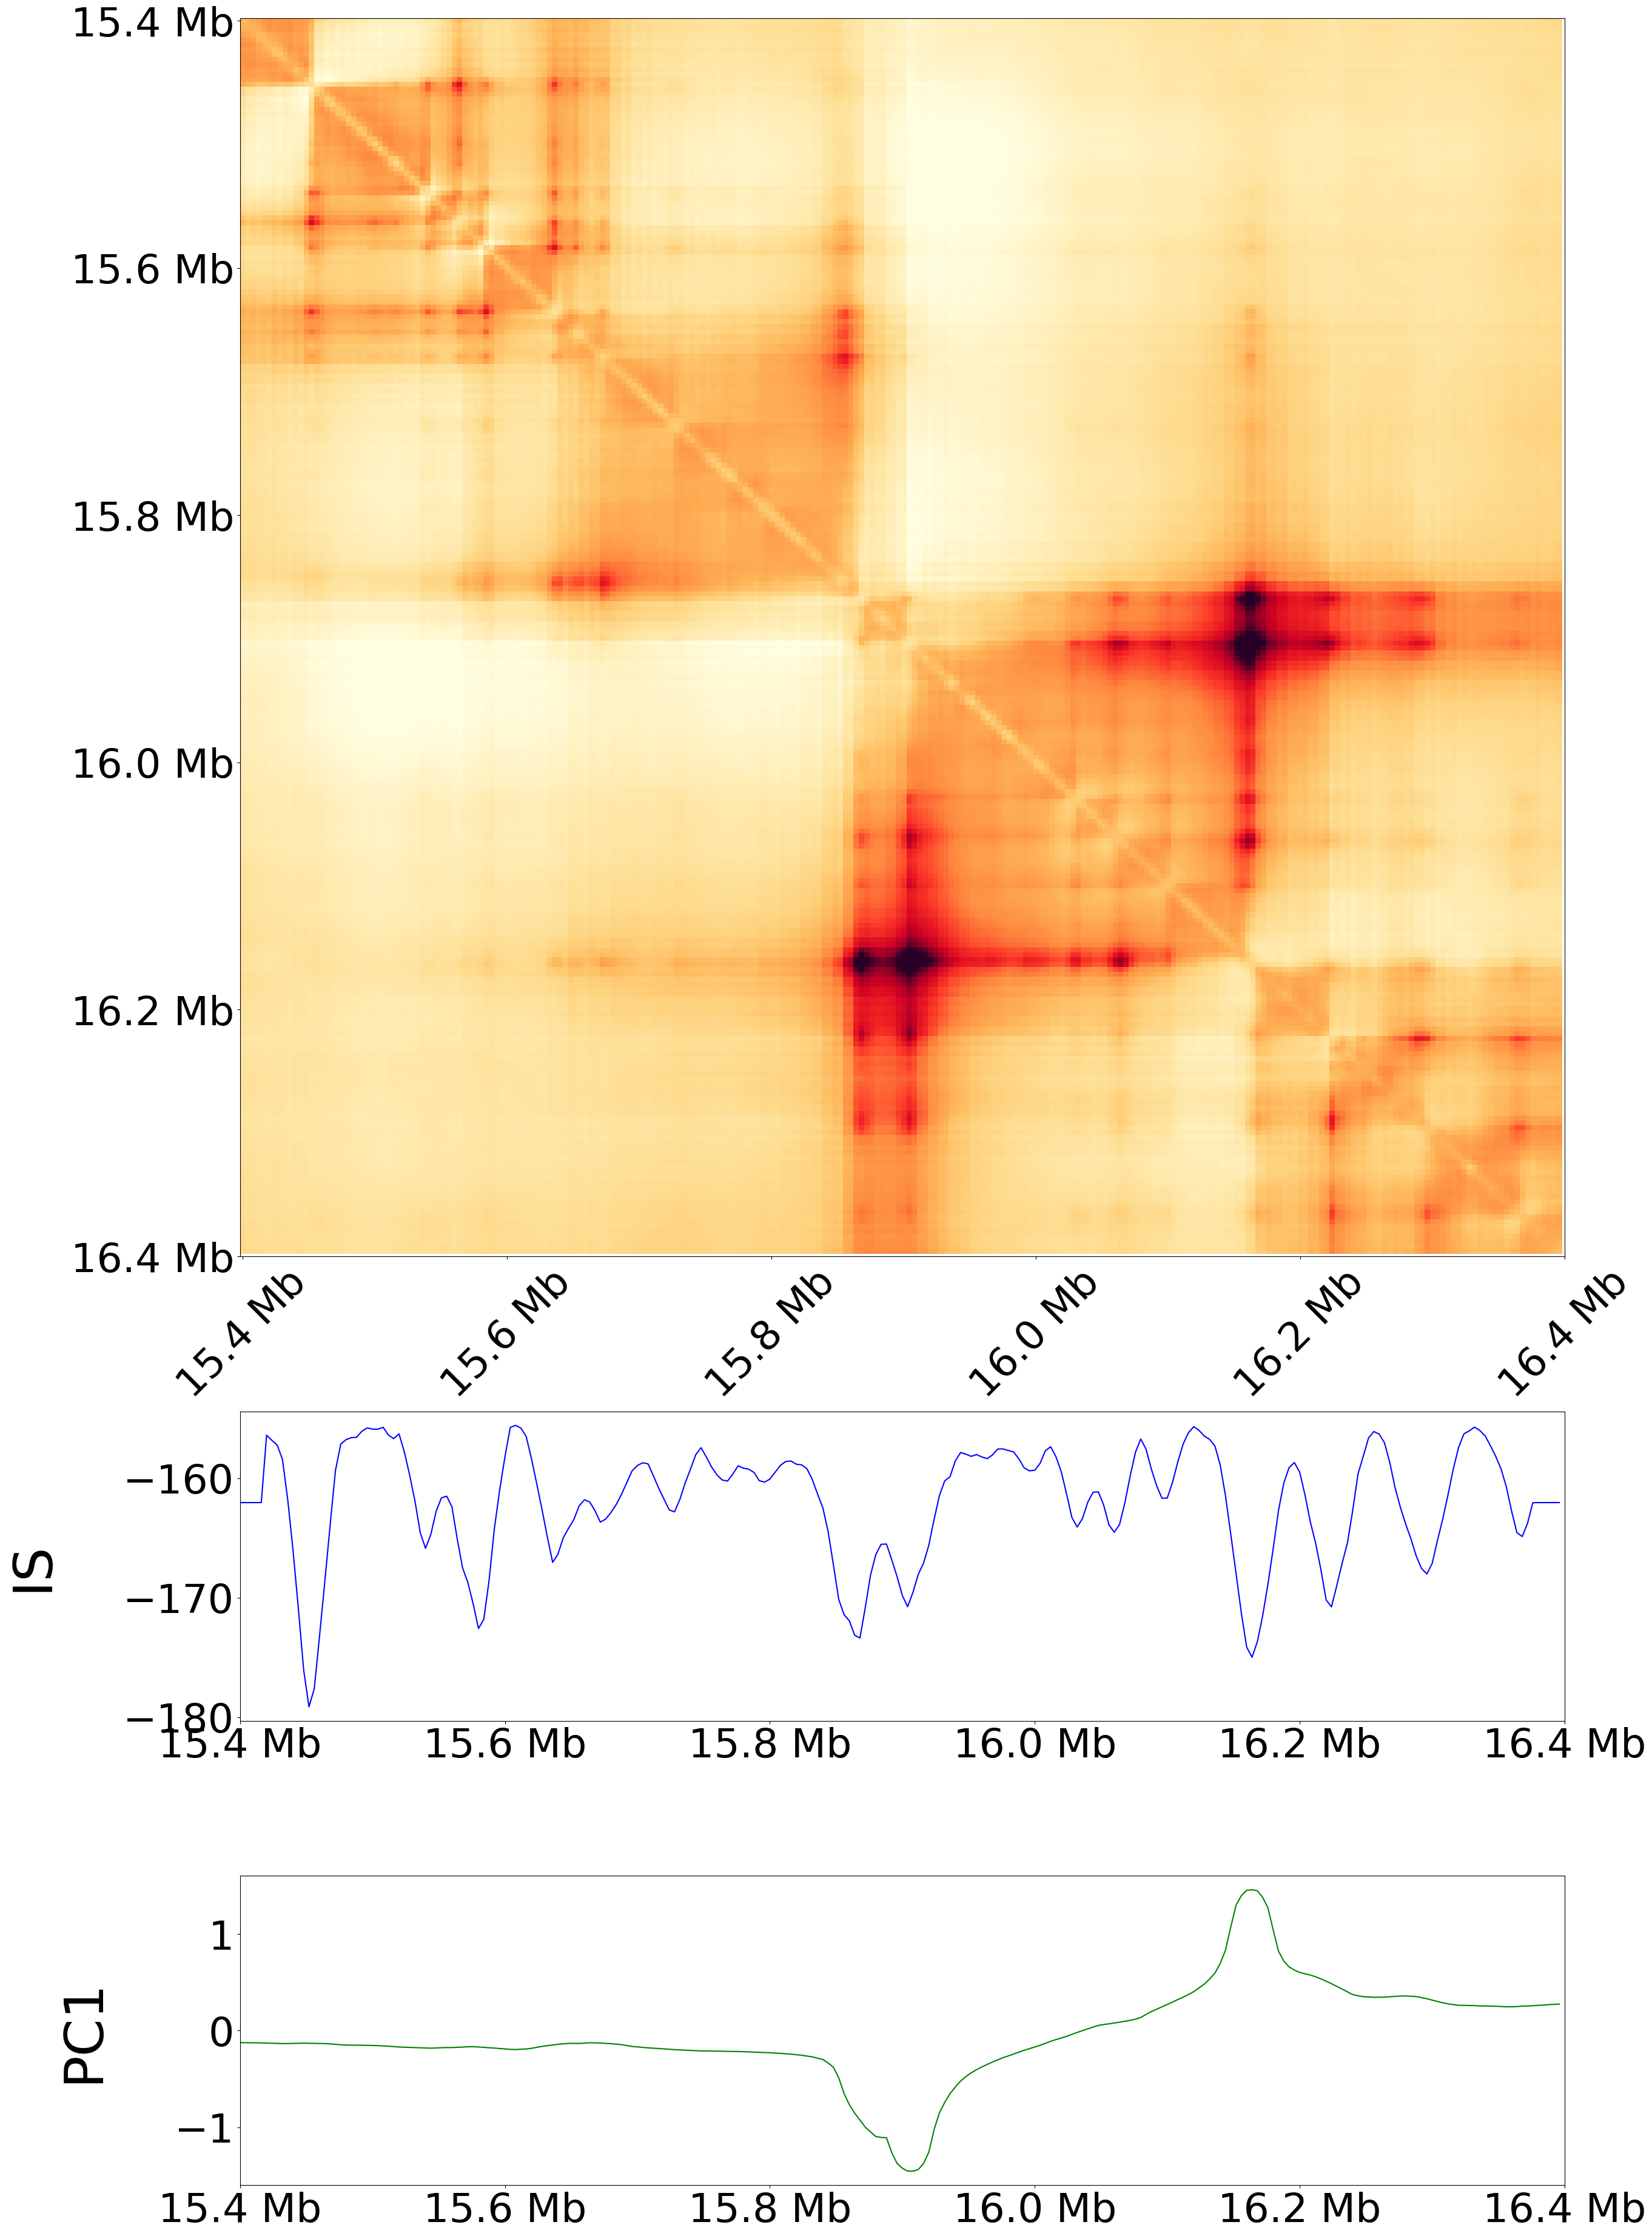

In [ ]:
plots_path = "PATH/TO/FIGURE/FOLDER/1D_metrics.pdf"
with PdfPages(plots_path, keep_empty=False) as pdf:
    gs = GridSpec(nrows=3, ncols=1, height_ratios=[2, .5, .5])
    f = plt.figure(clear=True, figsize=(28, 38))
    f.subplots_adjust(left=.15, right=.93, top=.97, bottom=.03, hspace=.25)
    ref_mat = mat_comparisons.ref.di["32Mb"]
    ax = ref_mat.heatmap_plot(gs=gs, f=f)
    ax.set_title("")
    ax.tick_params(axis="both", labelsize=48)

    ax = ref_mat._score_plot(gs=gs, f=f, title="", score_type="insulation_count", i=1)
    ax.tick_params(axis="both", labelsize=48)
    ax.set_ylabel("IS\n", fontsize=64)

    ax = ref_mat._score_plot(gs=gs, f=f, title="", score_type="PC1", i=2)
    ax.tick_params(axis="both", labelsize=48)
    ax.set_ylabel("PC1\n", fontsize=64)
    pdf.savefig()
    pdf.close()

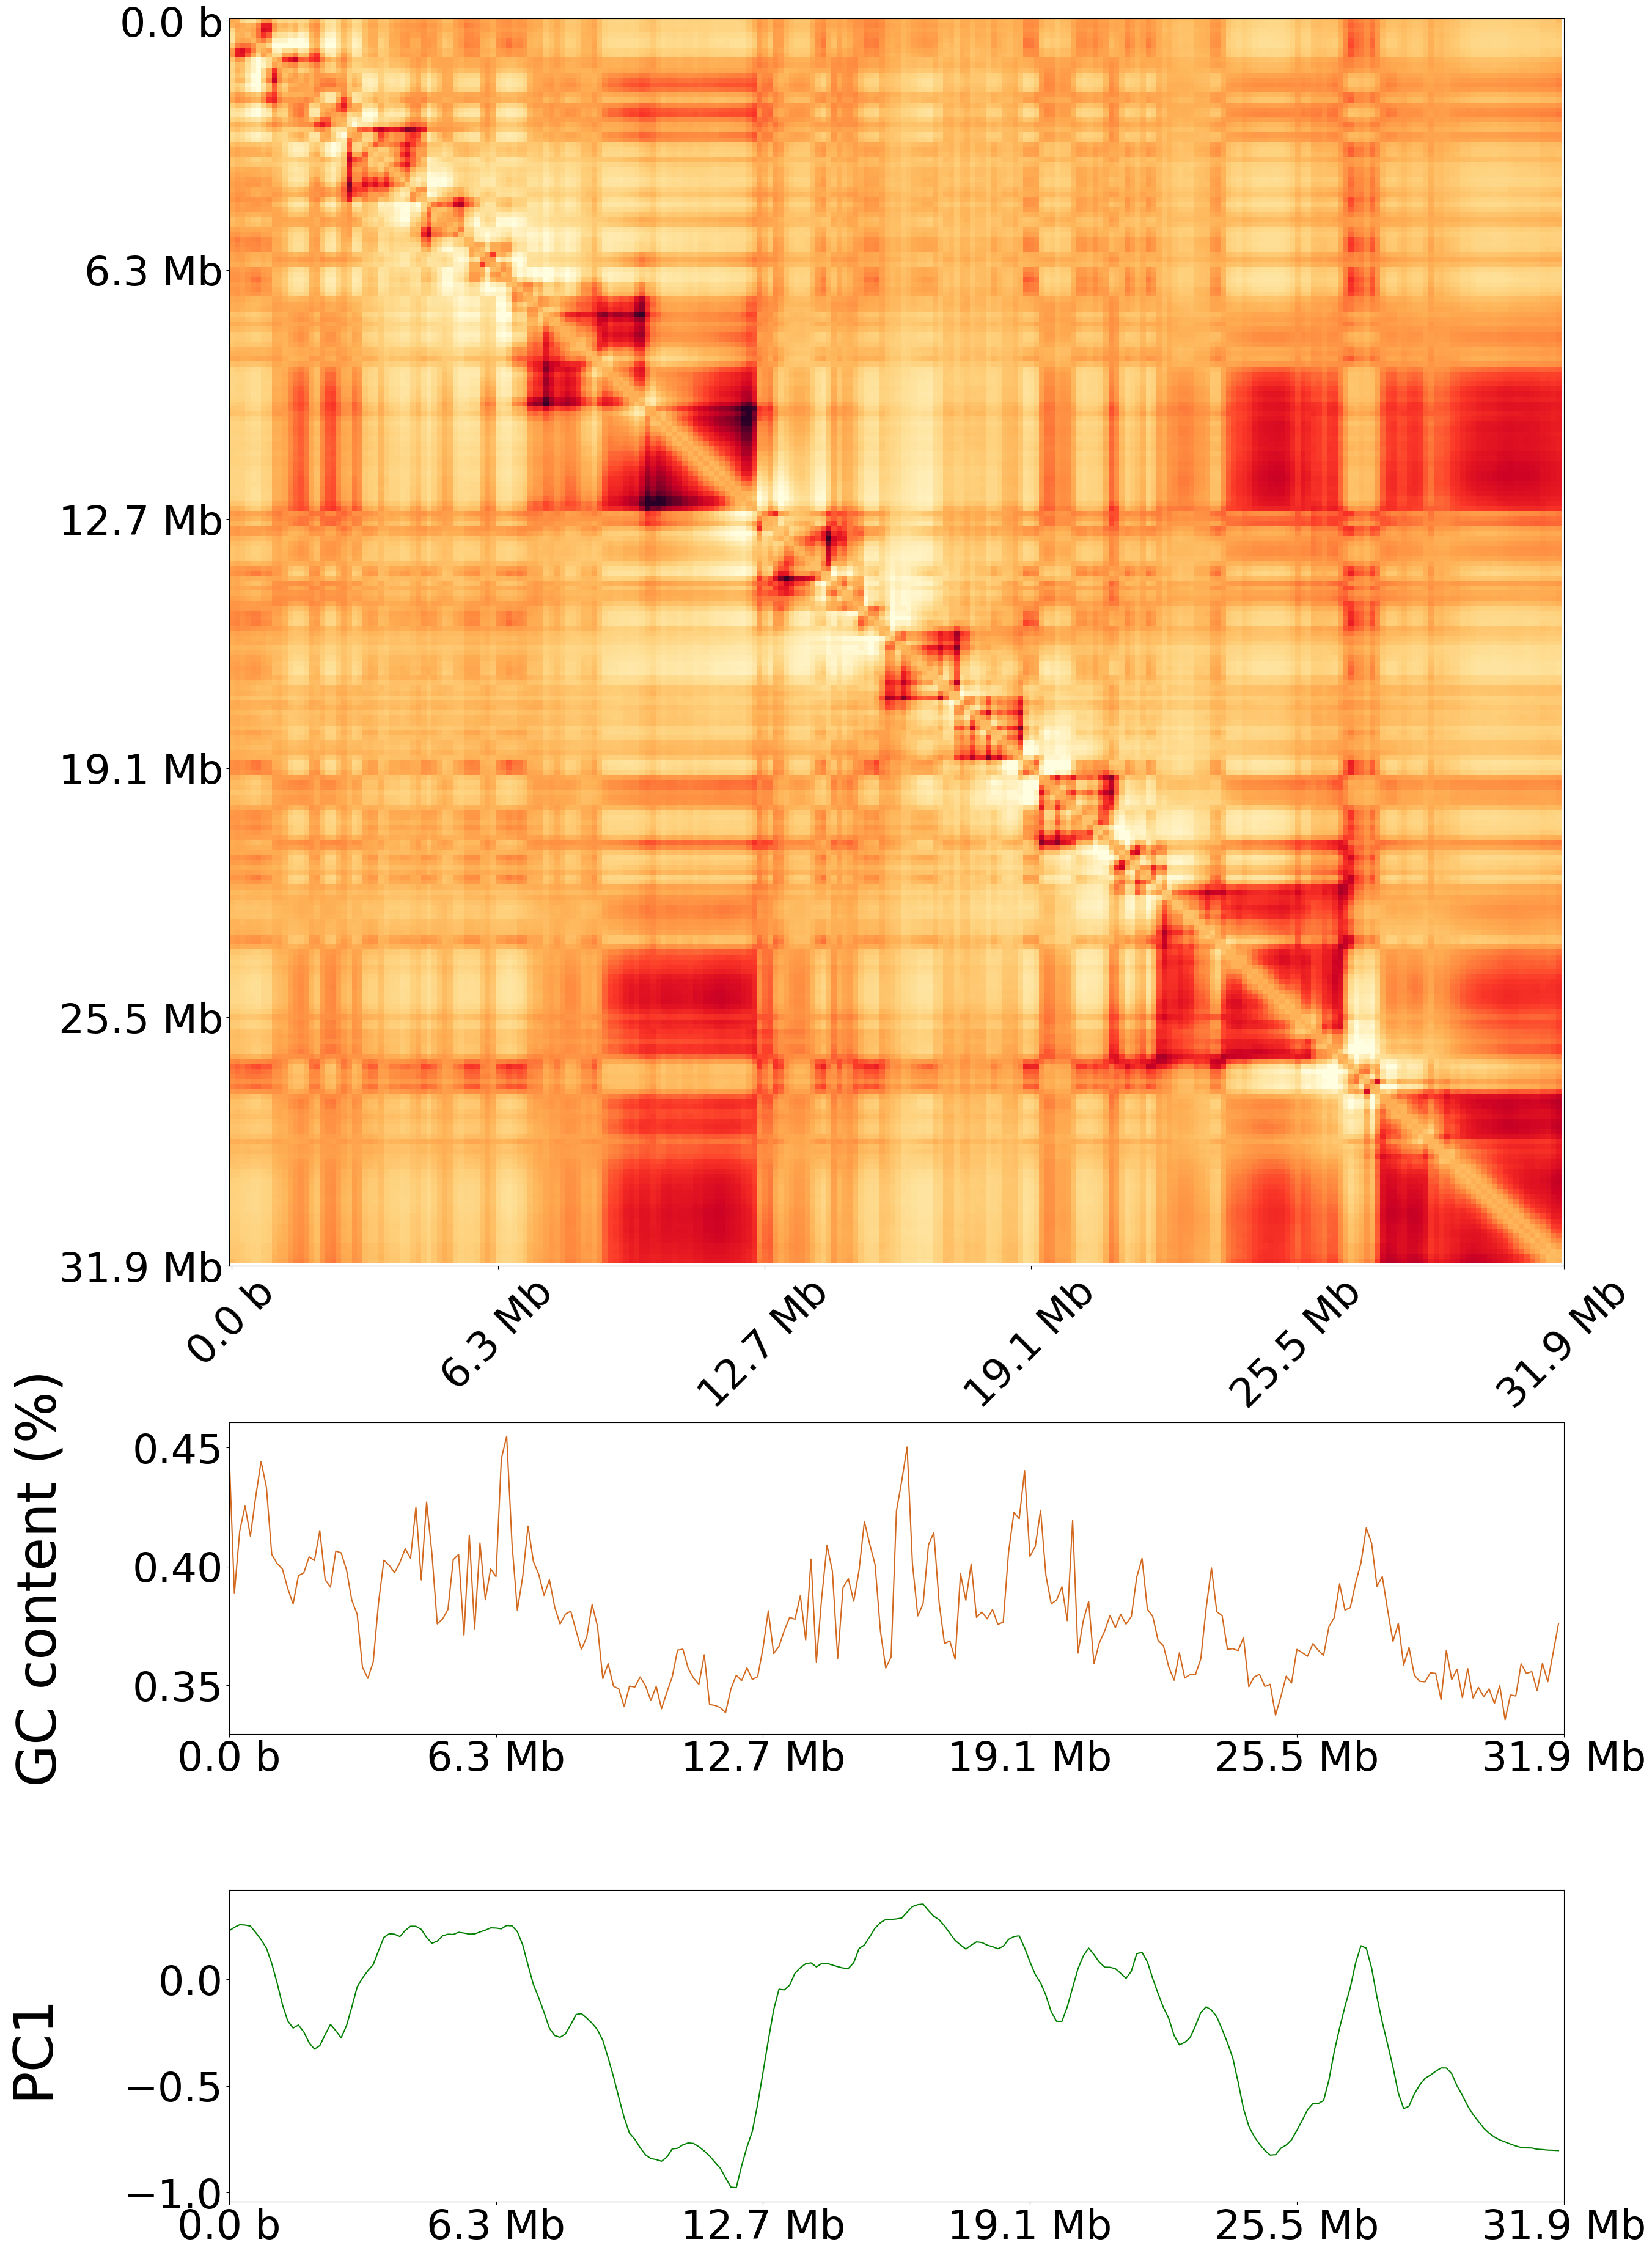

In [ ]:
plots_path = "PATH/TO/FIGURE/FOLDER/GC_percent.pdf"
with PdfPages(plots_path, keep_empty=False) as pdf:
    gs = GridSpec(nrows=3, ncols=1, height_ratios=[2, .5, .5])
    f = plt.figure(clear=True, figsize=(28, 38))
    f.subplots_adjust(left=.15, right=.93, top=.97, bottom=.03, hspace=.25)
    ref_mat = mat_comparisons.ref.di["32Mb"]
    ax = ref_mat.heatmap_plot(gs=gs, f=f)
    ax.set_title("")
    ax.tick_params(axis="both", labelsize=48)

    ax = ref_mat._score_plot(gs=gs, f=f, title="", score_type="gc_cov", i=1)
    ax.tick_params(axis="both", labelsize=48)
    ax.set_ylabel("GC content (%)\n", fontsize=64)

    ax = ref_mat._score_plot(gs=gs, f=f, title="", score_type="PC1", i=2)
    ax.tick_params(axis="both", labelsize=48)
    ax.set_ylabel("PC1\n", fontsize=64)
    pdf.savefig()
    pdf.close()